In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.pyplot as plt


In [25]:
data = pd.read_csv('BTC-USD.csv' )
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.dropna(inplace=True)
prices = data['Close'].values.reshape(-1, 1)
volume = data['Volume'].values.reshape(-1, 1)

# Normalize the prices and trading volume using the MinMaxScaler
price_scaler = MinMaxScaler(feature_range=(0, 1))
volume_scaler = MinMaxScaler(feature_range=(0, 1))
prices = price_scaler.fit_transform(prices)
volume = volume_scaler.fit_transform(volume)

# Combine the price and volume arrays into a single input array
input_data = np.concatenate((prices, volume), axis=1)



In [42]:
data['Close'].values.reshape(-1, 1)[-1]

array([28017.089844])

In [26]:
seq_length = 60
num_features = 2

# Split the data into training and testing sets
train_size = int(len(input_data) * 0.8)
train_data = input_data[:train_size]
test_data = input_data[train_size:]

# Create the training data sequences
train_X = []
train_y = []
for i in range(seq_length, len(train_data)):
    train_X.append(train_data[i-seq_length:i])
    train_y.append(prices[i])
train_X, train_y = np.array(train_X), np.array(train_y)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, num_features)))

model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
callbacks = [keras.callbacks.ModelCheckpoint("jena_conv.keras",save_best_only=True) ,
keras.callbacks.EarlyStopping( monitor="loss", min_delta=0, patience=2,  verbose=0,  mode="auto",  baseline=None,
    restore_best_weights=False,  start_from_epoch=0,)]

# Train the model
model.fit(train_X, train_y, epochs=100, batch_size=32,callbacks=callbacks) #validation_data=val_dataset,


Epoch 1/100


2023-04-04 09:00:41.698141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-04 09:00:41.701393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-04 09:00:41.703428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

44/44 [==============================] - 12s 103ms/step - loss: 0.0155
Epoch 2/100
44/44 [==============================] - 5s 103ms/step - loss: 0.0025
Epoch 3/100
44/44 [==============================] - 5s 103ms/step - loss: 0.0026
Epoch 4/100
44/44 [==============================] - 5s 111ms/step - loss: 0.0020
Epoch 5/100
44/44 [==============================] - 5s 104ms/step - loss: 0.0017
Epoch 6/100
44/44 [==============================] - 5s 105ms/step - loss: 0.0015
Epoch 7/100
44/44 [==============================] - 5s 103ms/step - loss: 0.0015
Epoch 8/100
44/44 [==============================] - 5s 104ms/step - loss: 0.0014
Epoch 9/100
44/44 [==============================] - 5s 104ms/step - loss: 0.0012
Epoch 10/100
44/44 [==============================] - 5s 103ms/step - loss: 0.0012
Epoch 11/100
44/44 [==============================] - 5s 105ms/step - loss: 0.0013


10/10 [==============================] - 0s 39ms/step


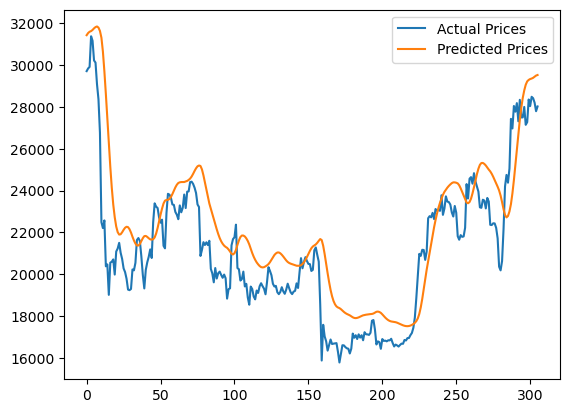

In [52]:

test_X = []
test_y = []
for i in range(seq_length, len(test_data)):
    test_X.append(test_data[i-seq_length:i])
    test_y.append(prices[i+ len(train_data)])
    # test_y.append(test_data[i][0])

test_X, test_y = np.array(test_X), np.array(test_y)

# Make predictions on the test data
predictions = model.predict(test_X)

# Inverse the predictions and actual prices back to their original scale
predictions = price_scaler.inverse_transform(predictions)
test_y = price_scaler.inverse_transform(test_y)

# Plot the predicted prices against the actual prices
plt.plot(test_y, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [34]:
test_y.shape

(306, 1)

In [49]:
test_data[1][0]

0.657845278783249